In [2]:
%load_ext autoreload
%autoreload 2

import numpy as np
import os, sys 
sys.path.append('..')
import collections
import copy
import itertools
import aoc_utils as au
import math 
from tqdm import tqdm

In [23]:
input_text = au.read_txt_file_lines('input.txt')
n_rows = len(input_text)
n_cols = len(input_text[0])
# for ii in range(1, n_rows):
#     assert len(input_text[ii]) == n_cols, f'row {ii} has {len(input_text[ii])} cols, not {n_cols}'
print(f'input has {n_rows} rows and {n_cols} cols')

input has 496 rows and 11 cols


In [ ]:
points = np.array([np.array([int(x) for x in k.split(',')]) for k in input_text])
n_points = len(points)

def size_rect(x, y):
    diff = np.abs(x - y)
    return (diff[0] + 1) * (diff[1] + 1)

dist_mat = np.array([[size_rect(x, y) for x in points] for y in points])
np.max(dist_mat)

np.int64(4743645488)

## part 2

Looking at the graph to see if there are any gnarly shapes (yes there is)

1828 98476


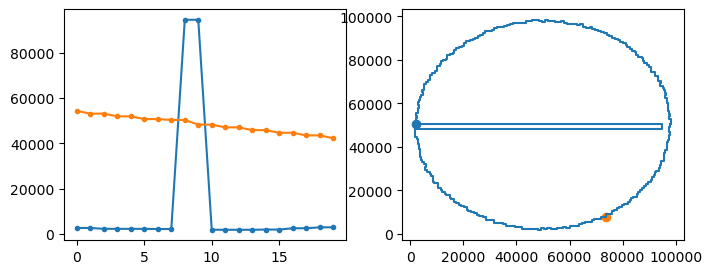

In [ ]:
assert np.all(points > 0)
print(np.min(points), np.max(points))

import matplotlib.pyplot as plt
fig, ax = plt.subplots(1, 2, figsize=(8, 3))
ax[0].plot(points[240:260], '.-')
## going anti clockwise, starting at 0 deg / E
ax[1].plot(points[:, 0], points[:, 1])
ax[1].scatter(points[247, 0], points[247, 1])
ax[1].scatter(points[412, 0], points[412, 1])

Bit of a hacky solution, but we now know that the biggest rectangle is either in bottom or top half, and has to have one of the two outliers as corner. The other corner is then bound by its y-coordinate. So 1) find the midpoints, 2) find where their x-values intersect with the line above or below, 3) find the opposite corner that is bound within the y-space.

In [ ]:
## Find midpoints:
points[246:251, :]

array([[ 2169, 50781],
       [ 2169, 50401],
       [94699, 50401],
       [94699, 48346],
       [ 1840, 48346]])

In [71]:
points[465:470, :]

array([[94317, 32685],
       [94502, 32685],
       [94502, 33573],
       [95609, 33573],
       [95609, 34821]])

In [ ]:
def size_p(x, y):
    return size_rect(points[x], points[y])

x_threshold = points[248, 0]
y_min_top = points[248, 1]
y_max_bottom = points[249, 1]

for i_p, p in enumerate(points[1:]):
    if p[0] > x_threshold and points[i_p, 0] < x_threshold:
        print('going under', i_p, i_p + 1, p)
        y_min_bottom = points[i_p, 1]
    elif p[0] < x_threshold and points[i_p, 0] > x_threshold:
        print('going over', i_p, i_p + 1, p)
        y_max_top = points[i_p, 1]

best_s = 0


print('top: ', y_min_top, y_max_top)
print('bottom: ', y_min_bottom, y_max_bottom) 
for i_p, p in enumerate(points):
    if p[1] >= y_min_bottom and p[1] <= y_max_bottom:
        s = size_p(i_p, 249)
        best_s = max(best_s, s) 
    elif p[1] >= y_min_top and p[1] <= y_max_top:
        s = size_p(i_p, 248)
        best_s = max(best_s, s)  
    
print(best_s)


going over 29 30 [93975 68026]
going under 467 468 [95609 33573]
top:  50401 68026
bottom:  33573 48346
1529011204
